In [1]:
from defectlib import load_tensors
from defectlib import load_tensors_all
from defectlib import combine_shuffle_tensors, display_tensor, keras_transform, make_model, train_model
from defectlib import Config, remove_sn, remain_sn
from matplotlib import image
from IPython.display import Image
from tqdm import tqdm, trange
import matplotlib.pyplot as plt
import defectlib
import cv2
import os
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [2]:
from defectlib import maybe_pickle

In [3]:
maybe_pickle('./defect_tensors_D10/')

100%|██████████| 4/4 [00:01<00:00,  2.22it/s]


In [4]:
defect_dict = load_tensors_all('./defect_tensors_D10/MCEWRF/', width=128)

(158, 95, 192)
(152, 95, 192)
(130, 95, 192)
(101, 175, 98)
(95, 175, 98)
(103, 175, 98)


In [5]:
defect_dict

{'2A': {'labels': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [6]:
tensors, labels, sns = combine_shuffle_tensors(defect_dict)

the final tensor should be 739
number of class 0: 259
	number of SN: 10
number of class 1: 247
	number of SN: 10
number of class 2: 233
	number of SN: 10


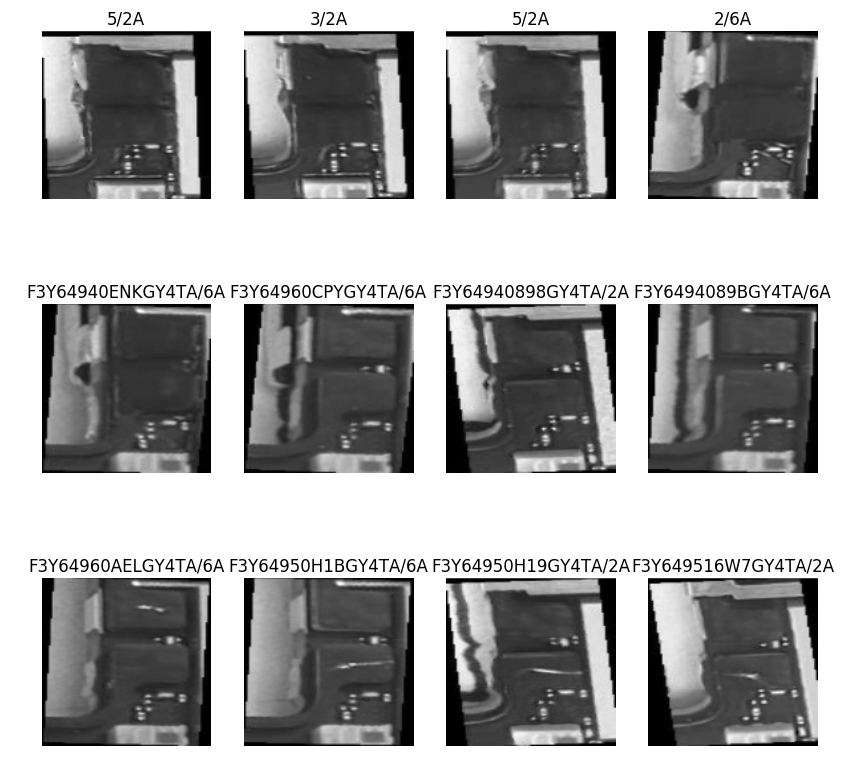

In [7]:
display_tensor(tensors, labels, sns)

In [8]:
from defectlib import GroupKFold_modeling

In [10]:
accuracy_dict, logloss_dict, escape_dict, accuracy_escape_list, models = GroupKFold_modeling(tensors, labels, sns, nb_classes=3, nb_epoch=10, input_shape=(128, 128))

Model 1
the label of validation image: 1
the s/n of validation image: F3Y64930Q60GY4TA
Train on 709 samples, validate on 30 samples
Epoch 1/10
709/709 [==============================] - 11s - loss: 1.0489 - acc: 0.4147 - val_loss: 0.8255 - val_acc: 1.0000
Epoch 2/10
709/709 [==============================] - 11s - loss: 0.8015 - acc: 0.6375 - val_loss: 0.4085 - val_acc: 1.0000
Epoch 3/10
709/709 [==============================] - 11s - loss: 0.5964 - acc: 0.7207 - val_loss: 0.1273 - val_acc: 1.0000
Epoch 4/10
709/709 [==============================] - 11s - loss: 0.4230 - acc: 0.8152 - val_loss: 0.1610 - val_acc: 1.0000
Epoch 5/10
709/709 [==============================] - 11s - loss: 0.3062 - acc: 0.8829 - val_loss: 0.0120 - val_acc: 1.0000
Epoch 6/10
709/709 [==============================] - 11s - loss: 0.2325 - acc: 0.9041 - val_loss: 0.0190 - val_acc: 1.0000
Epoch 7/10
709/709 [==============================] - 11s - loss: 0.1305 - acc: 0.9478 - val_loss: 0.0049 - val_acc: 1.0000


In [12]:
sorted(accuracy_escape_list, key=lambda x: x[0])

[(0, '3', 1.0, 1.0),
 (0, '1', 0.17857142857142858, 0.17857142857142858),
 (0, '2', 1.0, 1.0),
 (0, '4', 1.0, 1.0),
 (0, '5', 1.0, 1.0),
 (0, '0', 1.0, 1.0),
 (0, '8', 1.0, 1.0),
 (0, '7', 1.0, 1.0),
 (0, '6', 1.0, 1.0),
 (0, '9', 1.0, 1.0),
 (1, 'F3Y64930Q60GY4TA', 1.0, 0.0),
 (1, 'F3Y64960CPYGY4TA', 1.0, 0.0),
 (1, 'F3Y64950TP5GY4TA', 1.0, 0.0),
 (1, 'F3Y64940ENNGY4TA', 0.27586206896551724, 0.0),
 (1, 'F3Y64940ENKGY4TA', 0.14814814814814814, 0.8518518518518519),
 (1, 'F3Y64940898GY4TA', 1.0, 0.0),
 (1, 'F3Y64940ENLGY4TA', 1.0, 0.0),
 (1, 'F3Y6494089BGY4TA', 0.90909090909090906, 0.0),
 (1, 'F3Y64940899GY4TA', 1.0, 0.0),
 (1, 'F3Y649112PTGY4TA', 0.90909090909090906, 0.0),
 (2, 'F3Y64950H18GY4TA', 0.34482758620689657, 0.0),
 (2, 'F3Y64950H19GY4TA', 0.10714285714285714, 0.0),
 (2, 'F3Y649516W8GY4TA', 1.0, 0.0),
 (2, 'F3Y649516W7GY4TA', 1.0, 0.0),
 (2, 'F3Y649516WAGY4TA', 1.0, 0.0),
 (2, 'F3Y64960AELGY4TA', 1.0, 0.0),
 (2, 'F3Y64960AENGY4TA', 1.0, 0.0),
 (2, 'F3Y64950H1BGY4TA', 1.0, 0.0),

In [15]:
def find_tensor(tensors, labels, sns, nb_sn):
    '''
    '''
    sn_only = np.array([x.split('/')[0] for x in sns])
    display_tensor(tensors[sn_only == nb_sn], labels[sn_only == nb_sn], sns[sn_only == nb_sn])

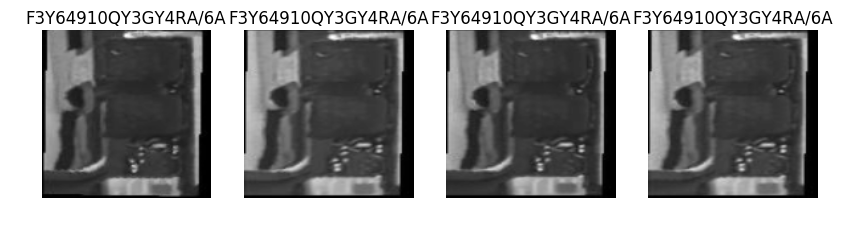

In [16]:
find_tensor(tensors, labels, sns, 'F3Y64910QY3GY4RA')

In [17]:
from IPython.display import Image

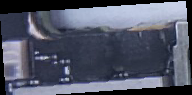

In [19]:
Image('./defect_tensors_D10/MCEWRF/2A/MCEW-RF_2A_c2/F3Y64910QY3GY4RA 2AAAAAA_46.jpg')

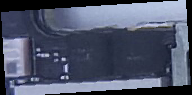

In [21]:
Image('./defect_tensors_D10/MCEWRF/2A/MCEW-RF_2A_c0/0 2AAAAAA_58.jpg')